In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [83]:
csv_data = pd.read_csv('train.csv')
csv_data_test = pd.read_csv('test.csv')
csv_data_validation = pd.read_csv('validation.csv')
print(csv_data.shape)
print(csv_data_test.shape)
print(csv_data_validation.shape)

(2430981, 25)
(303375, 22)
(303925, 25)


In [74]:
csv_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [75]:
type(csv_data['weekday'])

pandas.core.series.Series

# CTR for Weekday

In [76]:
ctr_for_weekday=[]
for i in range(7):
    csv_data_weekday=csv_data[(csv_data.weekday==i)]
    csv_data_weekday_click=csv_data_weekday[(csv_data_weekday.click==1)]
    ctr_for_weekday_i=len(csv_data_weekday_click)/len(csv_data_weekday)
    ctr_for_weekday.append(ctr_for_weekday_i)

In [77]:
ctr_for_weekday

[0.0006437742751600528,
 0.0006763290272813203,
 0.0009647885898569009,
 0.0008332670841835308,
 0.000809771239624806,
 0.0007251014261306592,
 0.0005690915470738964]

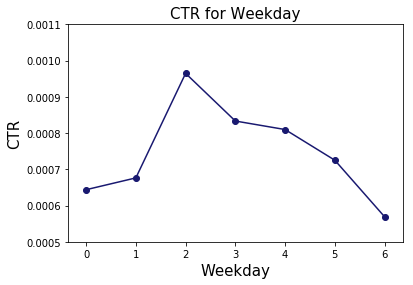

In [78]:
plt.plot(range(7),ctr_for_weekday, color='midnightblue')
plt.scatter(range(7),ctr_for_weekday, color='midnightblue')
plt.xlabel('Weekday',fontsize=15)
plt.ylabel('CTR',fontsize=15)
plt.ylim(0.0005,0.0011)
plt.title('CTR for Weekday',fontsize=15)
plt.savefig('CTR for weekday Q1.jpg')

# CTR for Hour

In [79]:
ctr_for_hour=[]
for i in range(24):
    csv_data_hour=csv_data[(csv_data.hour==i)]
    csv_data_hour_click=csv_data_hour[(csv_data_hour.click==1)]
    ctr_for_hour_i=len(csv_data_hour_click)/len(csv_data_hour)
    ctr_for_hour.append(ctr_for_hour_i)

In [80]:
len(ctr_for_hour)

24

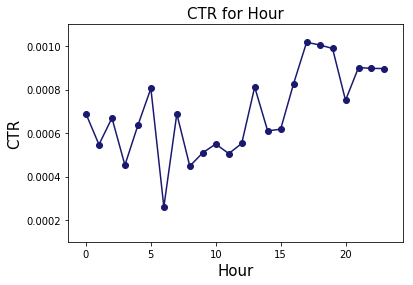

In [82]:
plt.plot(range(24),ctr_for_hour, color='midnightblue')
plt.scatter(range(24),ctr_for_hour, color='midnightblue')
plt.xlabel('Hour',fontsize=15)
plt.ylabel('CTR',fontsize=15)
plt.ylim(0.0001,0.0011)
plt.title('CTR for Hour',fontsize=15)
plt.savefig('CTR for Hour Q1.jpg')

# Differenfce between bidprice and payprice

In [7]:
difference_bidprice_payprice=(csv_data['bidprice']-csv_data['payprice'])

In [11]:
(difference_bidprice_payprice)

0          233
1          271
2          214
3          275
4          144
5          177
6          280
7          166
8          230
9          164
10          79
11          10
12         224
13         273
14         147
15         280
16         133
17         295
18         153
19         230
20         220
21         266
22         222
23         230
24         266
25         205
26         166
27         153
28          14
29         104
          ... 
2430951    215
2430952    259
2430953    129
2430954    286
2430955    209
2430956      0
2430957    138
2430958     60
2430959    179
2430960     22
2430961    164
2430962    252
2430963    164
2430964    182
2430965    296
2430966    204
2430967    265
2430968    225
2430969     83
2430970    252
2430971     87
2430972    250
2430973    233
2430974    227
2430975    233
2430976     83
2430977    203
2430978     81
2430979    286
2430980    200
Length: 2430981, dtype: int64

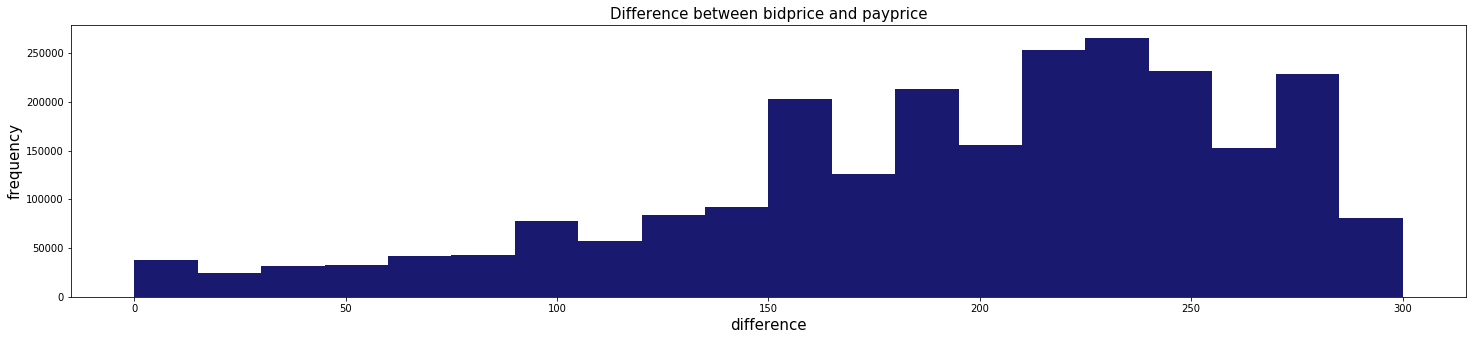

In [68]:
plt.figure(figsize=(25,5))
plt.hist(difference_bidprice_payprice, bins=20,color='midnightblue')
plt.xlabel('difference',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('Difference between bidprice and payprice',fontsize=15)
#plt.savefig('Differnece between bidprice adn payprice Q1.jpg')

# payprice&bidprice distribution (click and nonclick)

In [23]:
data_click_1=csv_data[(csv_data.click==1)]

In [25]:
data_click_0=csv_data[(csv_data.click==0)]

In [26]:
bidprice_click1=data_click_1['bidprice']/
bidprice_click0=data_click_0['bidprice']

In [45]:
print(len(bidprice_click1))
print(len(bidprice_click0))

1793
2429188


In [27]:
payprice_click1=data_click_1['payprice']
payprice_click0=data_click_0['payprice']

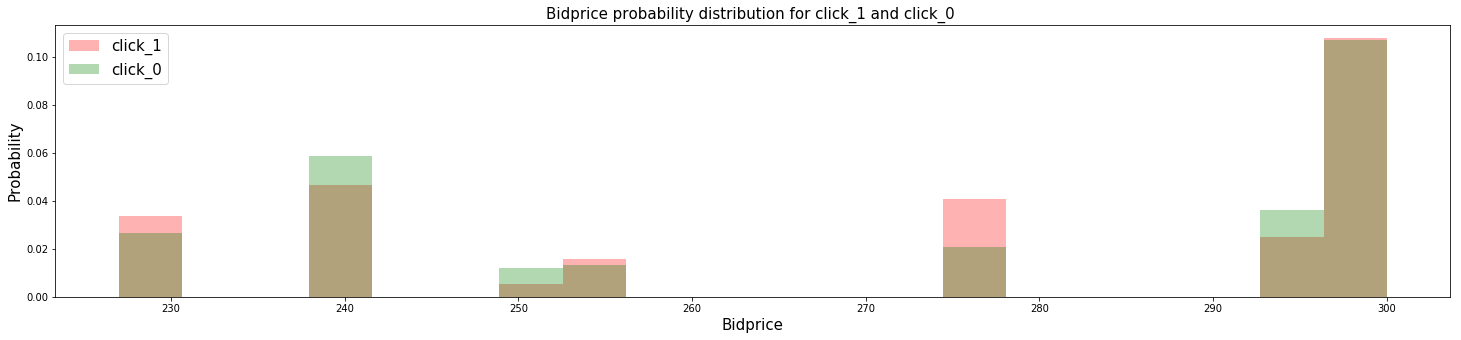

In [69]:
plt.figure(figsize=(25,5))
plt.hist(bidprice_click1,bins=20,color='r',label='click_1',alpha=0.3,density=bool)
plt.hist(bidprice_click0,bins=20,color='g', label='click_0',alpha=0.3,density=bool)
plt.xlabel('Bidprice',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.title('Bidprice probability distribution for click_1 and click_0 ',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('Bidprice probability distribution for click_1 and click_0 of Q1.jpg')

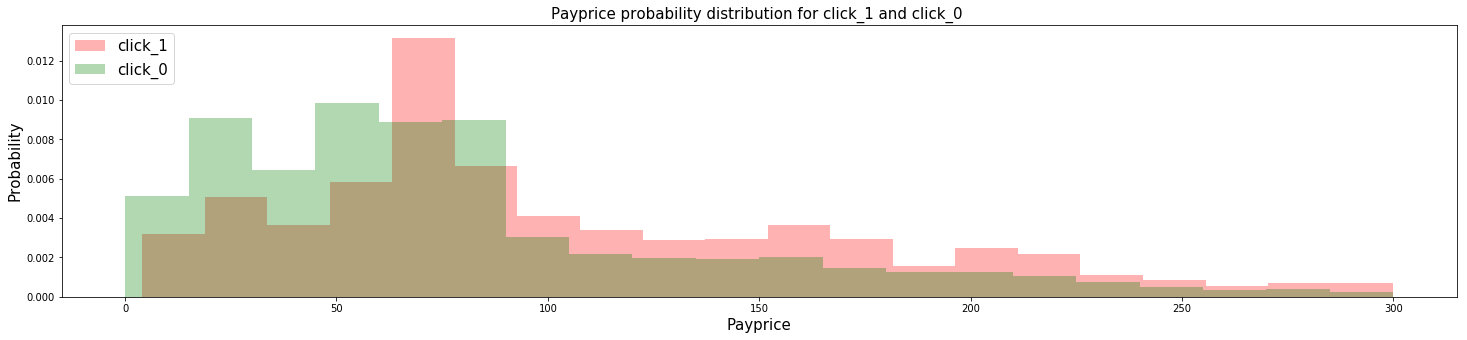

In [70]:
plt.figure(figsize=(25,5))
plt.hist(payprice_click1,bins=20,color='r',label='click_1',alpha=0.3,density=bool)
plt.hist(payprice_click0,bins=20,color='g', label='click_0',alpha=0.3,density=bool)
plt.xlabel('Payprice',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.title('Payprice probability distribution for click_1 and click_0 ',fontsize=15)
plt.legend(fontsize=15,loc='upper left')
#plt.savefig('Payprice probability distribution for click_1 and click_0 of Q1.jpg')


In [67]:
np.sqrt(4)

2.0